In [27]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv

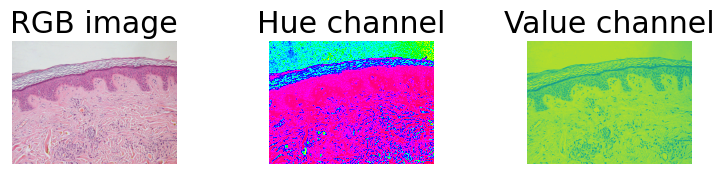

In [37]:
rgb_img = data.skin()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

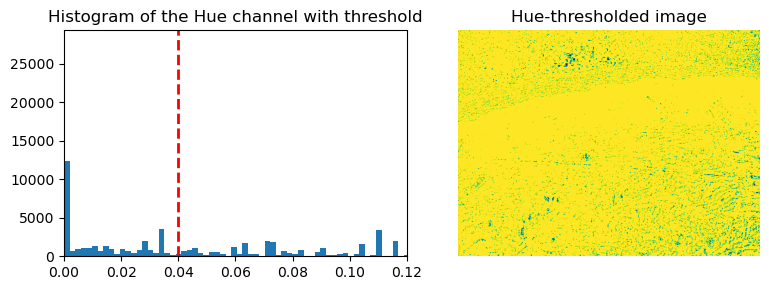

In [15]:
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

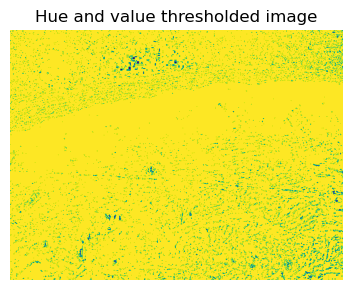

In [16]:
fig, ax0 = plt.subplots(figsize=(4, 3))

value_threshold = 0.10
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

ax0.imshow(binary_img)
ax0.set_title("Hue and value thresholded image")
ax0.axis('off')

fig.tight_layout()
plt.show()

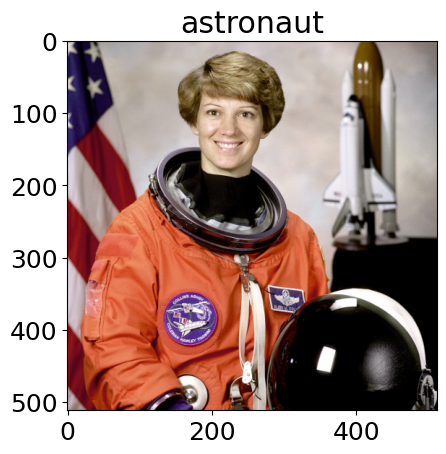

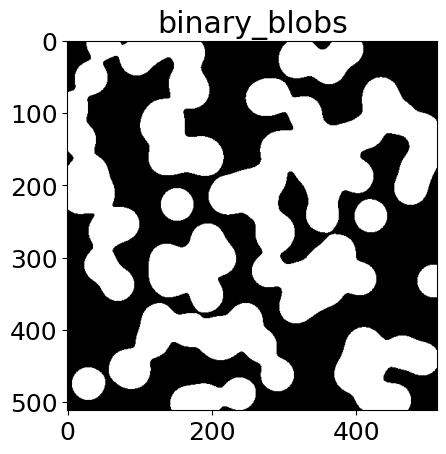

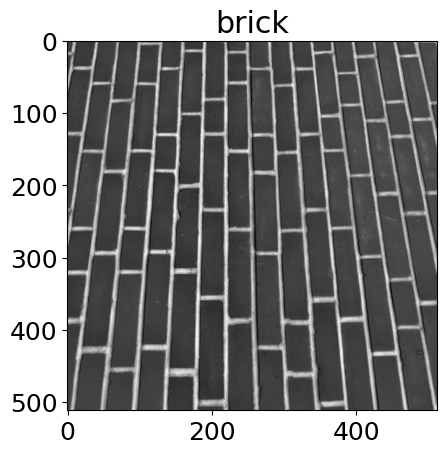

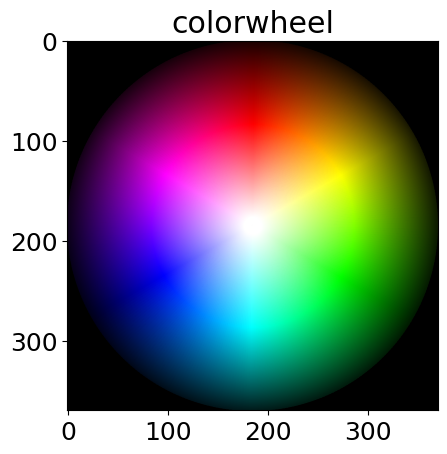

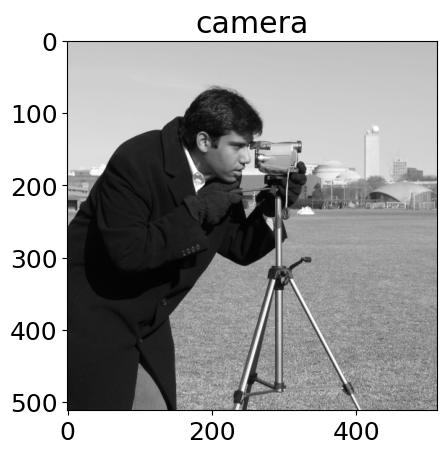

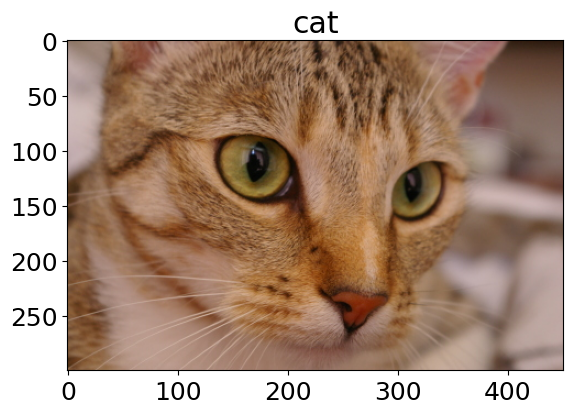

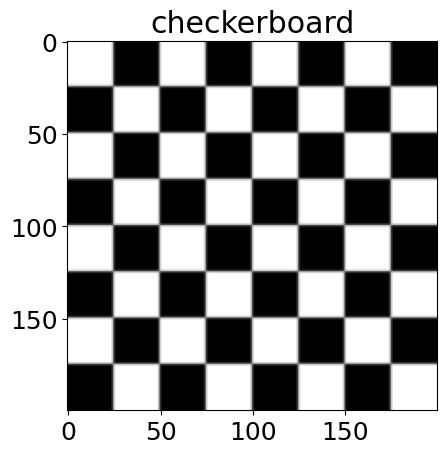

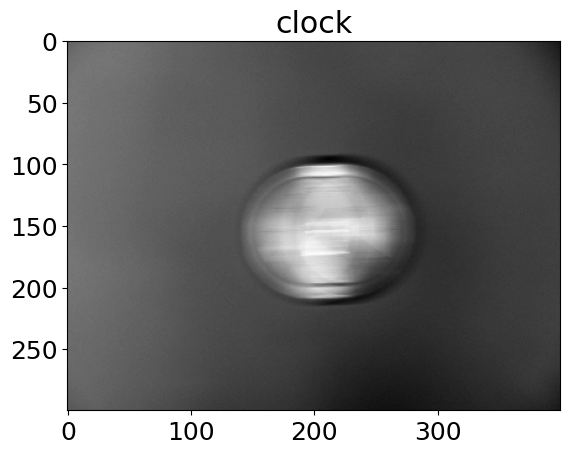

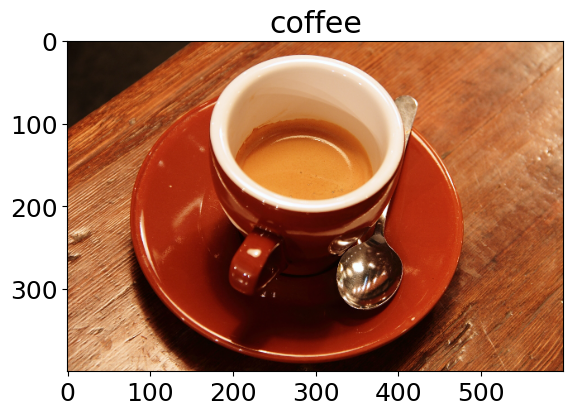

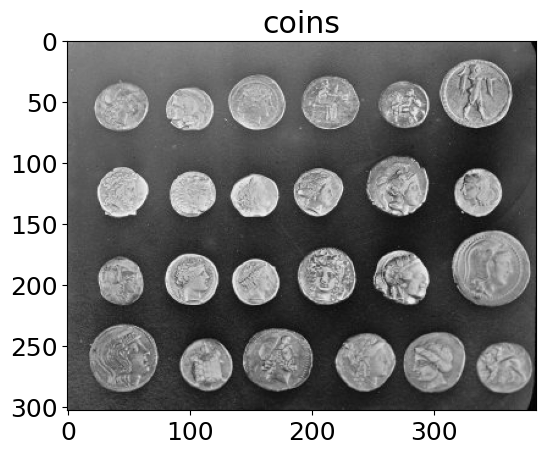

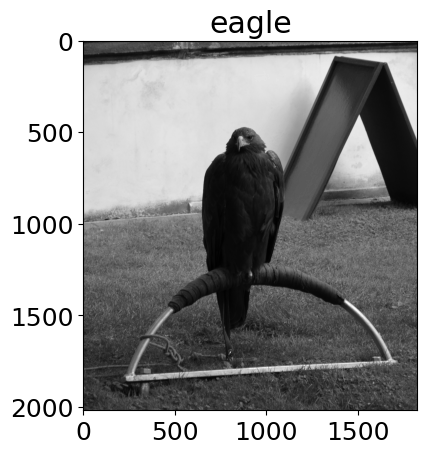

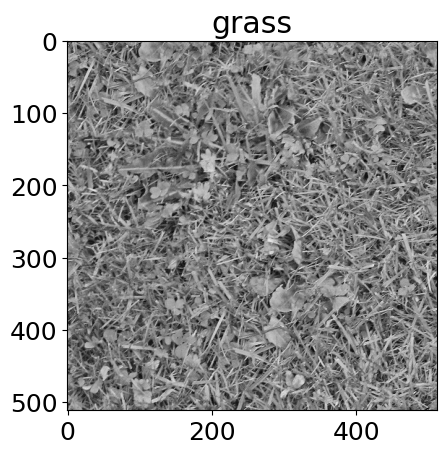

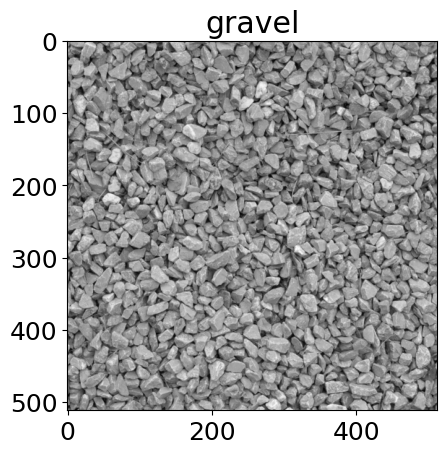

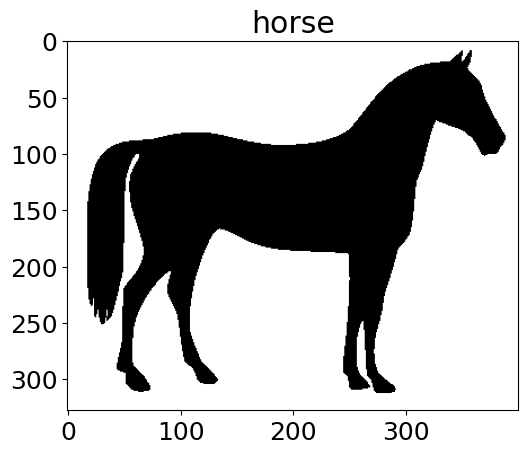

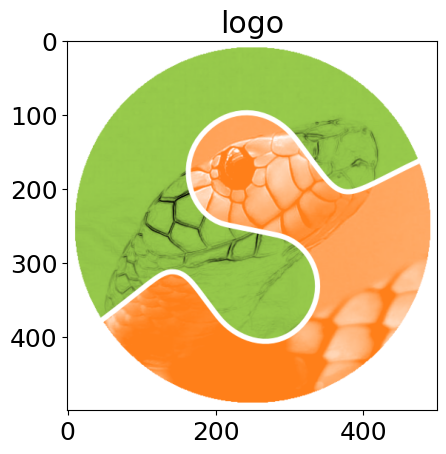

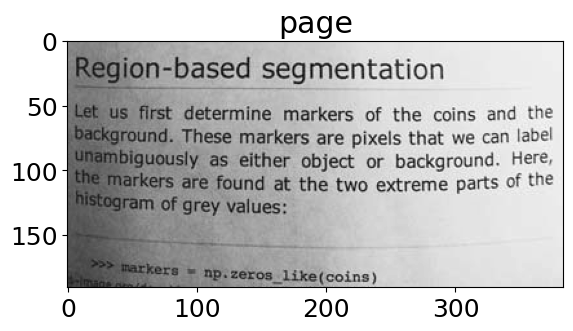

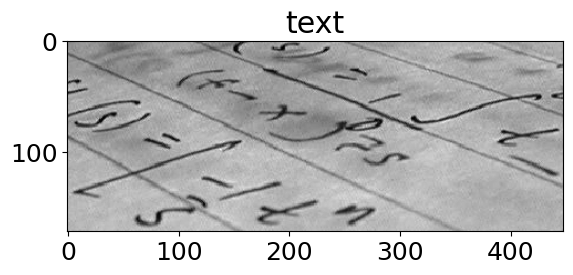

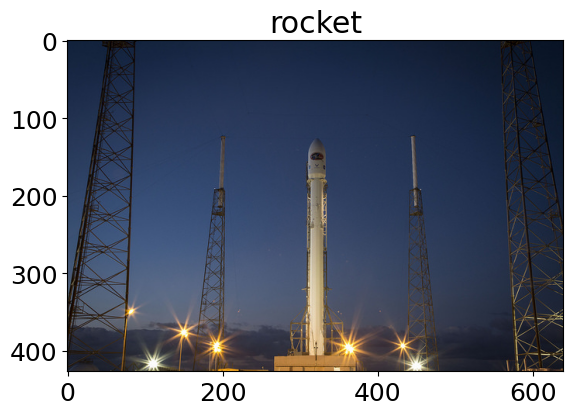

In [21]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from skimage import data

matplotlib.rcParams['font.size'] = 18

images = ('astronaut',
          'binary_blobs',
          'brick',
          'colorwheel',
          'camera',
          'cat',
          'checkerboard',
          'clock',
          'coffee',
          'coins',
          'eagle',
          'grass',
          'gravel',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )


for name in images:
    caller = getattr(data, name)
    image = caller()
    plt.figure()
    plt.title(name)
    if image.ndim == 2:
        plt.imshow(image, cmap=plt.cm.gray)
    else:
        plt.imshow(image)

plt.show()

In [30]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from skimage import data, transform, exposure
from skimage.util import compare_images

In [38]:

img1 = data.page()
img1_equalized = exposure.equalize_hist(img1)
img2 = transform.rotate(img1, 2)


comp_equalized = compare_images(img1, img1_equalized, method='checkerboard')
diff_rotated = compare_images(img1, img2, method='diff')
blend_rotated = compare_images(img1, img2, method='blend')

[]

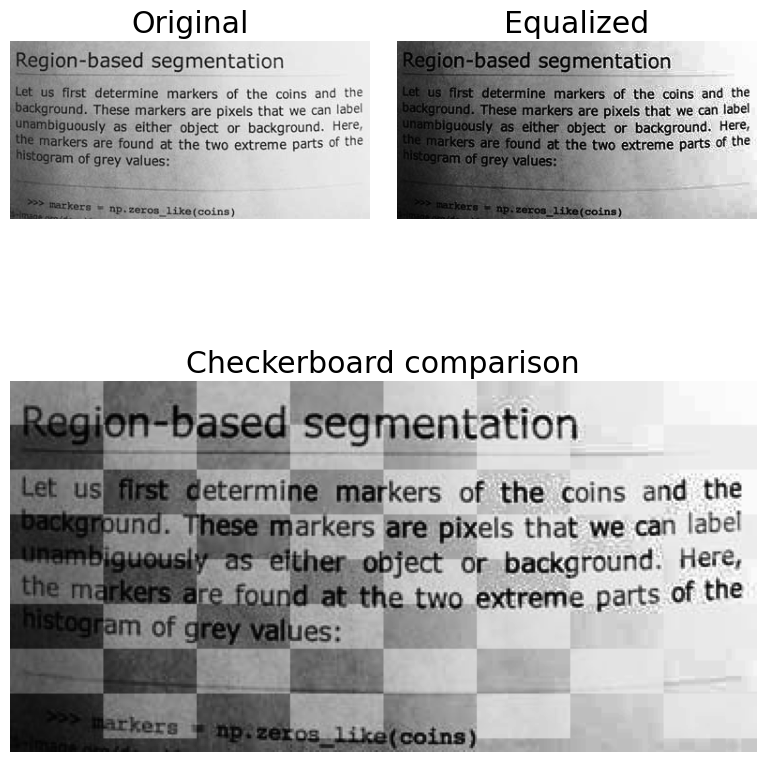

In [39]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img1_equalized, cmap='gray')
ax1.set_title('Equalized')
ax2.imshow(comp_equalized, cmap='gray')
ax2.set_title('Checkerboard comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()

[]

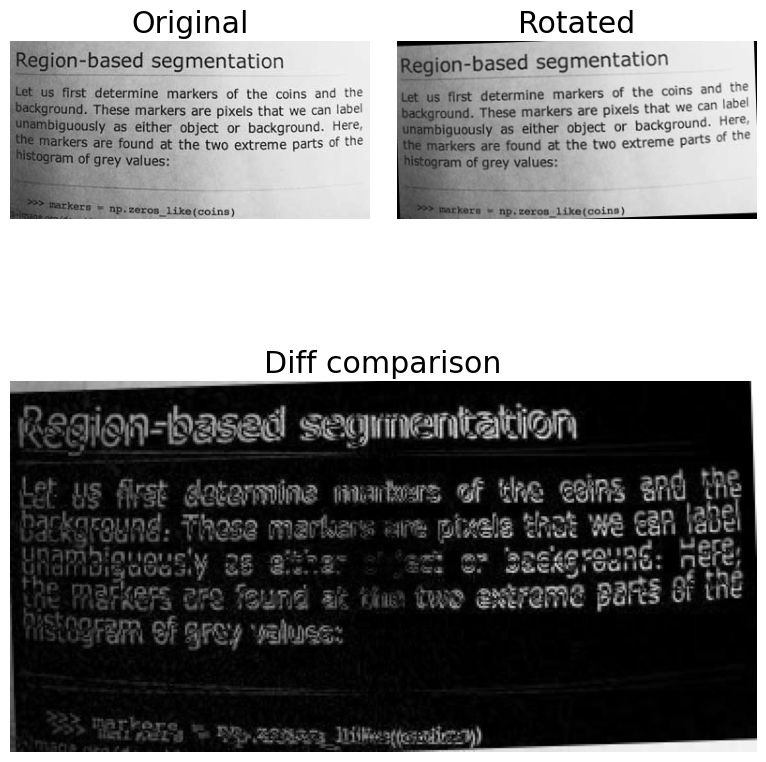

In [40]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img2, cmap='gray')
ax1.set_title('Rotated')
ax2.imshow(diff_rotated, cmap='gray')
ax2.set_title('Diff comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()

[]

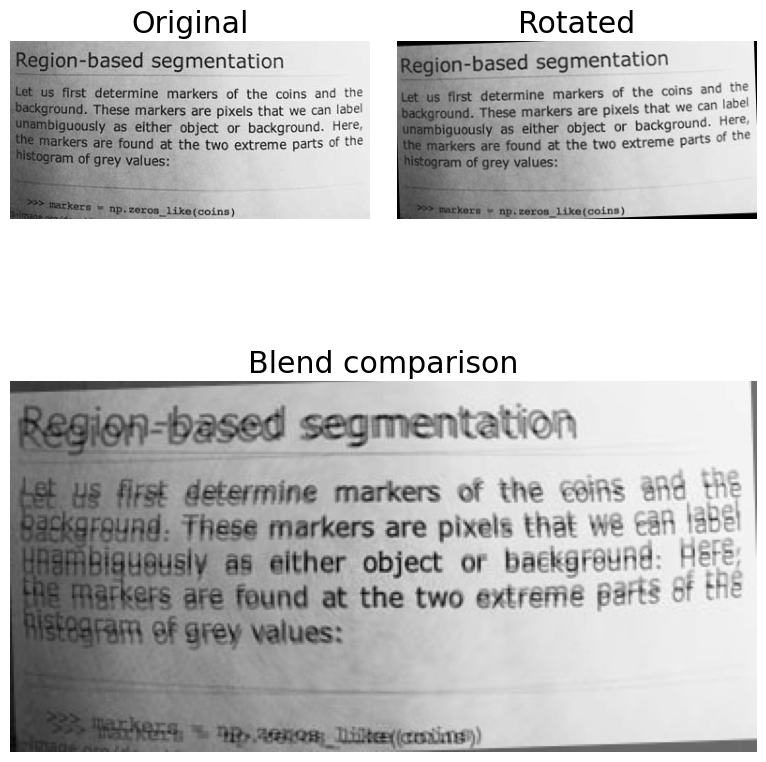

In [41]:
fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img2, cmap='gray')
ax1.set_title('Rotated')
ax2.imshow(blend_rotated, cmap='gray')
ax2.set_title('Blend comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()